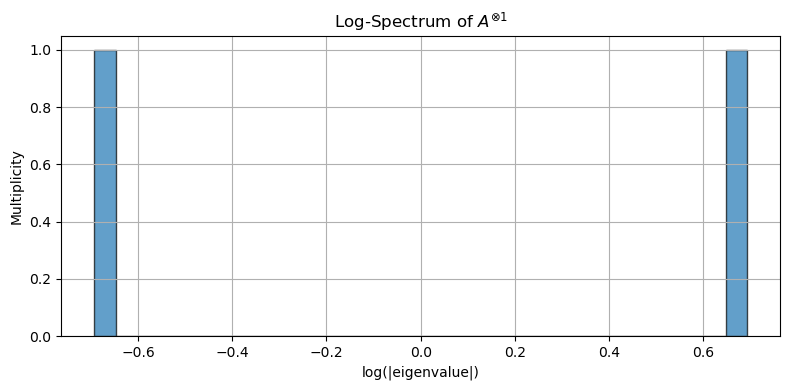

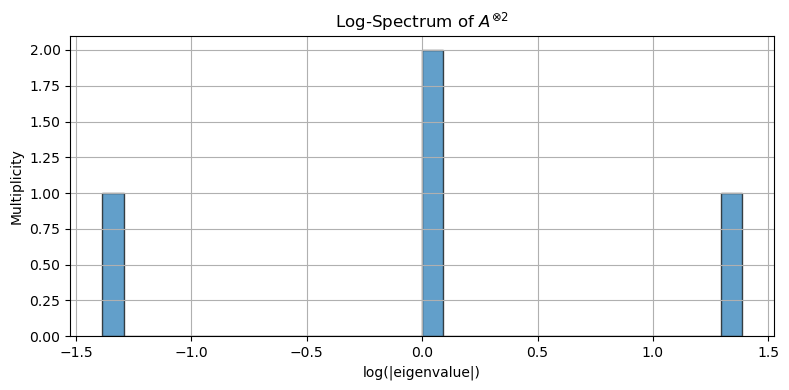

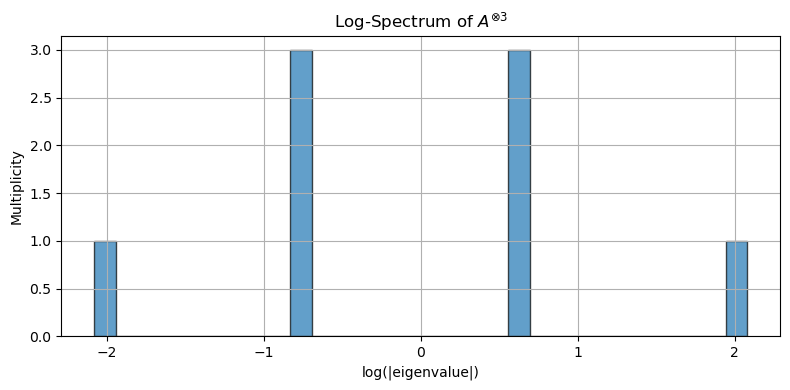

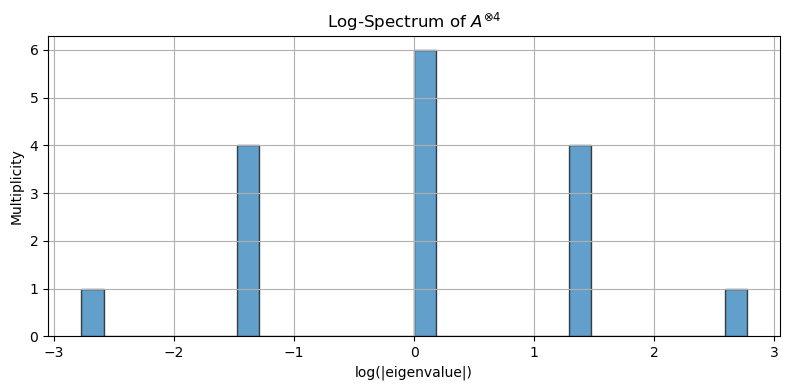

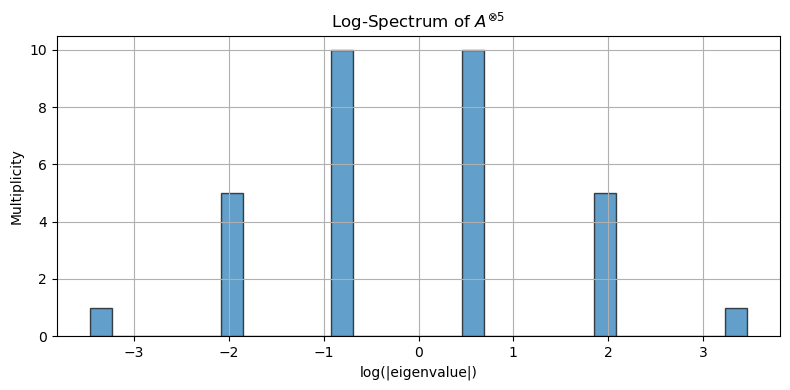

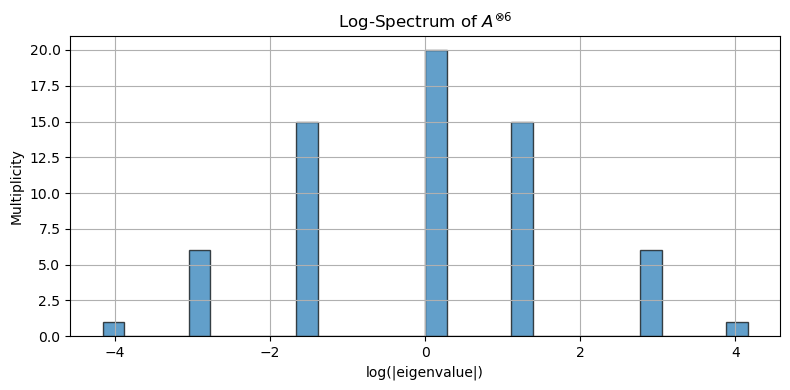

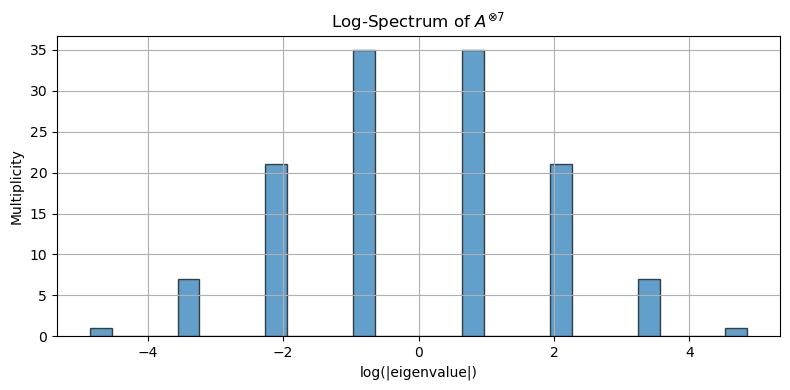

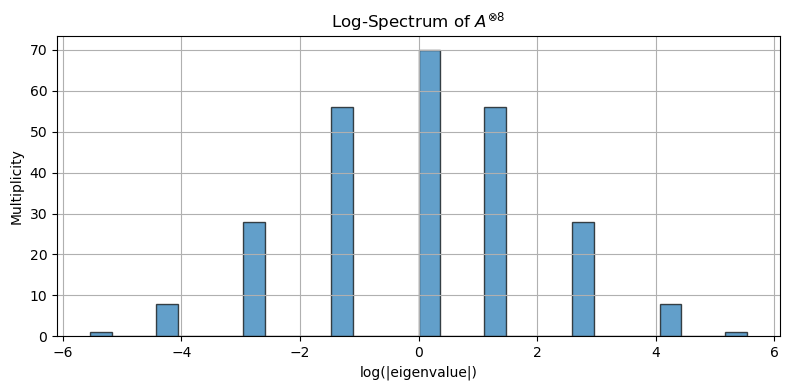

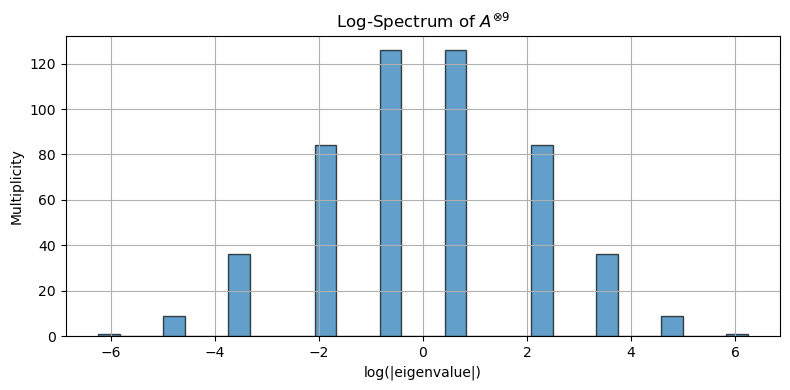

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define matrix A
A = np.array([[2, 0], [0, 0.5]])

# Get eigenvalues of A
eigvals = np.linalg.eigvals(A)


def get_kron_eigvals(eigvals, n):
    """
    Recursively compute the eigenvalues of A^{⊗n}
    by multiplying combinations of eigenvalues.
    """
    # Initialize with eigenvalues of A
    eigvals_n = eigvals.copy()
    for _ in range(1, n):
        eigvals_n = np.outer(eigvals_n, eigvals).flatten()
    return eigvals_n


def plot_spectrum(n, log_scale=False):
    eigs = get_kron_eigvals(eigvals, n)

    if log_scale:
        eigs = np.log(np.abs(eigs))
        title = f"Log-Spectrum of $A^{{\\otimes {n}}}$"
        xlabel = "log(|eigenvalue|)"
    else:
        title = f"Spectrum of $A^{{\\otimes {n}}}$"
        xlabel = "Eigenvalue"

    # Histogram
    plt.figure(figsize=(8, 4))
    plt.hist(eigs, bins=30, edgecolor="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Multiplicity")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot examples
for n in range(1, 10):
    plot_spectrum(n, log_scale=True)

In [2]:
import numpy as np


def kron_power(matrix, n):
    """
    Computes the Kronecker (tensor) power: matrix^{⊗n}
    """
    result = matrix
    for _ in range(1, n):
        result = np.kron(result, matrix)
    return result


def compute_tensor_prod_spectrum(A, B, i, j):
    """
    Computes (A^{⊗i} ⊗ B^{⊗j}) and its eigenvalues.
    Returns:
        - full Kronecker product matrix
        - eigenvalues
    """
    A_kron = kron_power(A, i)
    B_kron = kron_power(B, j)
    full_kron = np.kron(A_kron, B_kron)
    eigvals = np.linalg.eigvals(full_kron)
    return full_kron, eigvals


# Example matrices
A = np.array([[2, 0], [0, 0.5]])

B = np.array([[0, 1], [1, 0]])

# Choose tensor powers
i = 4
j = 4

# Compute
tensor_prod, eigs = compute_tensor_prod_spectrum(A, B, i, j)

# Print results
print(f"(A^{i} ⊗ B^{j}) has shape: {tensor_prod.shape}")
print("Eigenvalues:")
print(np.round(eigs, 4))  # rounded for readability

(A^4 ⊗ B^4) has shape: (256, 256)
Eigenvalues:
[ 16.     -16.      16.     -16.      16.     -16.      16.     -16.
  16.     -16.      16.     -16.      16.     -16.      16.     -16.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.      

In [3]:
n, m, p, q = 2, 2, 2, 2  # Dimensions of matrices A and B

# Matrix dimensions
A_shape = (n, m)  # Dimensions of matrix A (n x m)
B_shape = (p, q)  # Dimensions of matrix B (p x q)

# Tensor powers
i = 6
j = 6

# Calculate the total number of elements in the Kronecker product
rows_A = A_shape[0] * (2**i)
cols_A = A_shape[1] * (2**i)
rows_B = B_shape[0] * (2**j)
cols_B = B_shape[1] * (2**j)

# Total number of elements in the final matrix
total_elements = rows_A * cols_A * rows_B * cols_B

# Space complexity in bytes (assuming float64 = 8 bytes per element)
space_bytes = total_elements * 8

# Convert to GB
space_gb = space_bytes / (1024**3)

print(f"Estimated space complexity for A^{i} ⊗ B^{j}: {space_gb:.4f} GB")

Estimated space complexity for A^6 ⊗ B^6: 2.0000 GB


In [4]:
def generate_young_diagrams(n, max_rows=3):
    """Generate all valid Young diagrams with n boxes and up to max_rows rows."""

    def partitions(n, max_len, max_val):
        if n == 0:
            return [[]]
        if max_len == 0:
            return []
        result = []
        for i in range(min(n, max_val), 0, -1):
            for tail in partitions(n - i, max_len - 1, i):
                result.append([i] + tail)
        return result

    # Pad with zeros so all diagrams have exactly 3 elements (3 rows)
    raw = partitions(n, max_rows, n)
    return [tuple(p + [0] * (max_rows - len(p))) for p in raw if len(p) <= max_rows]


def dynkin_labels(diagram):
    """Convert a Young diagram (as tuple) to SU(3) Dynkin labels (a, b)."""
    λ1, λ2, λ3 = diagram[:3]  # Always safe now
    return (λ1 - λ2, λ2 - λ3)


def su3_dimension(a, b):
    """Compute dimension of SU(3) irrep with Dynkin labels (a, b)."""
    return (a + 1) * (b + 1) * (a + b + 2) // 2


def diagram_to_string(diagram):
    """Return a string representation of a Young diagram."""
    return "\n".join(["□ " * row for row in diagram if row > 0])


def generate_su3_irreps(n):
    print(f"\nSU(3) irreducible decomposition of 3^{n} = {3**n}-dim space:\n")
    diagrams = generate_young_diagrams(n)
    total_dim = 0
    for d in diagrams:
        a, b = dynkin_labels(d)
        dim = su3_dimension(a, b)
        total_dim += dim
        print(f"Diagram: {d}  →  Dynkin (a={a}, b={b}) → Dim: {dim}")
        print(diagram_to_string(d))
        print("-" * 30)
    print(f"Total dimension check: {total_dim}")


# Try it now for n = 5
generate_su3_irreps(5)


SU(3) irreducible decomposition of 3^5 = 243-dim space:

Diagram: (5, 0, 0)  →  Dynkin (a=5, b=0) → Dim: 21
□ □ □ □ □ 
------------------------------
Diagram: (4, 1, 0)  →  Dynkin (a=3, b=1) → Dim: 24
□ □ □ □ 
□ 
------------------------------
Diagram: (3, 2, 0)  →  Dynkin (a=1, b=2) → Dim: 15
□ □ □ 
□ □ 
------------------------------
Diagram: (3, 1, 1)  →  Dynkin (a=2, b=0) → Dim: 6
□ □ □ 
□ 
□ 
------------------------------
Diagram: (2, 2, 1)  →  Dynkin (a=0, b=1) → Dim: 3
□ □ 
□ □ 
□ 
------------------------------
Total dimension check: 69


In [5]:
def generate_young_diagrams(n, max_rows=3):
    """Generate all valid Young diagrams with n boxes and up to max_rows rows."""

    def partitions(n, max_len, max_val):
        if n == 0:
            return [[]]
        if max_len == 0:
            return []
        result = []
        for i in range(min(n, max_val), 0, -1):
            for tail in partitions(n - i, max_len - 1, i):
                result.append([i] + tail)
        return result

    # Pad with zeros so all diagrams have exactly max_rows rows
    raw = partitions(n, max_rows, n)
    return [tuple(p + [0] * (max_rows - len(p))) for p in raw if len(p) <= max_rows]


def dynkin_labels(diagram):
    λ1, λ2, λ3 = diagram[:3]
    return (λ1 - λ2, λ2 - λ3)


def su3_dimension(a, b):
    return (a + 1) * (b + 1) * (a + b + 2) // 2


def standard_tableaux_count(shape):
    """Hook-length formula for number of standard Young tableaux of a given shape."""
    from math import factorial

    n = sum(shape)
    hooks = []
    rows = shape
    for i in range(len(rows)):
        for j in range(rows[i]):
            hook_len = rows[i] - j
            for k in range(i + 1, len(rows)):
                if j < rows[k]:
                    hook_len += 1
            hooks.append(hook_len)
    product = 1
    for h in hooks:
        product *= h
    return factorial(n) // product


def diagram_to_string(diagram):
    return "\n".join(["□ " * row for row in diagram if row > 0])


def generate_su3_irreps_with_multiplicities(n):
    print(f"\nSU(3) irreducible decomposition of 3^{n} = {3**n}-dim space:\n")
    diagrams = generate_young_diagrams(n)
    total_dim = 0
    for d in diagrams:
        a, b = dynkin_labels(d)
        dim = su3_dimension(a, b)
        mult = standard_tableaux_count(d)
        total_contribution = mult * dim
        total_dim += total_contribution
        print(f"Diagram: {d}  →  Dynkin (a={a}, b={b}) → Dim: {dim} × Mult: {mult} = {total_contribution}")
        print(diagram_to_string(d))
        print("-" * 80)
    print(f"Total dimension check: {total_dim}")


generate_su3_irreps_with_multiplicities(10)


SU(3) irreducible decomposition of 3^10 = 59049-dim space:

Diagram: (10, 0, 0)  →  Dynkin (a=10, b=0) → Dim: 66 × Mult: 1 = 66
□ □ □ □ □ □ □ □ □ □ 
--------------------------------------------------------------------------------
Diagram: (9, 1, 0)  →  Dynkin (a=8, b=1) → Dim: 99 × Mult: 9 = 891
□ □ □ □ □ □ □ □ □ 
□ 
--------------------------------------------------------------------------------
Diagram: (8, 2, 0)  →  Dynkin (a=6, b=2) → Dim: 105 × Mult: 35 = 3675
□ □ □ □ □ □ □ □ 
□ □ 
--------------------------------------------------------------------------------
Diagram: (8, 1, 1)  →  Dynkin (a=7, b=0) → Dim: 36 × Mult: 36 = 1296
□ □ □ □ □ □ □ □ 
□ 
□ 
--------------------------------------------------------------------------------
Diagram: (7, 3, 0)  →  Dynkin (a=4, b=3) → Dim: 90 × Mult: 75 = 6750
□ □ □ □ □ □ □ 
□ □ □ 
--------------------------------------------------------------------------------
Diagram: (7, 2, 1)  →  Dynkin (a=5, b=1) → Dim: 48 × Mult: 160 = 7680
□ □ □ □ □ □